In [1]:
import cellular_automata as ca
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
GENERATIONS = 200
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85
TAU = 0

In [23]:
# clusters over time with threshold at 50
history, M_cluster = ca.simulate_tumor_growth_with_clusters(TAU, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

all_clusters = [ca.find_clusters(M_cluster[g],ROWS,COLS) for g in range(GENERATIONS)]
cluster_sizes = [len(all_clusters[g]) for g in range(GENERATIONS)]

In [24]:
for g in range(GENERATIONS):
    if cluster_sizes[g] > 49:
        T_m = g
        break

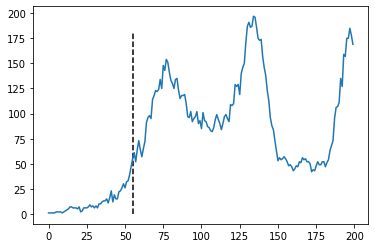

In [25]:
plt.plot(cluster_sizes)
plt.vlines(T_m,0,180, linestyles='--')

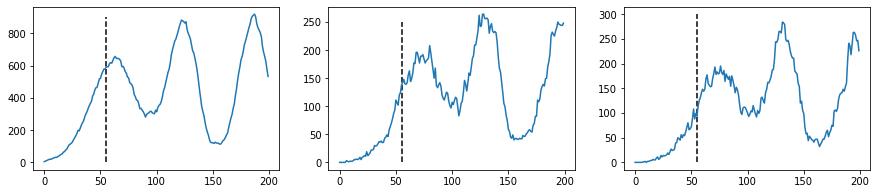

In [30]:
# number of cells for each type with threshold at 50
Nc_history = [history[g]['Nc'] for g in range(GENERATIONS)] 
Ne_history = [history[g]['Ne'] for g in range(GENERATIONS)] 
Nd_history = [history[g]['Nd'] for g in range(GENERATIONS)] 

fig,ax = plt.subplots(1,3, figsize=[15,3])
ax[0].plot(Nc_history)
ax[0].vlines(T_m,0,900, linestyles='--')
ax[1].plot(Ne_history)
ax[1].vlines(T_m,0,250, linestyles='--')
ax[2].plot(Nd_history)
ax[2].vlines(T_m,0,300, linestyles='--')

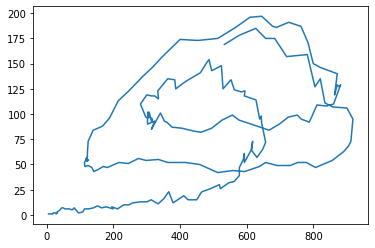

In [31]:
# Nc vs eta
plt.plot(Nc_history,cluster_sizes)